# Average True Range

| Metric | Selected paramaters | All paramaters |
| ---: | :---: | :---: |
| Precision | 0.211| 0.139|
| Recall |0.250 | 0.251|
| F1 |0.083 |0.079 |

| Name | Correlation | Importance |
| --- | :---: | :---: |
| atr_o_close | 0.21 | 0.085|
| atr_14 | 0.19 | 0.049|
| atr_200 | 0.18 | 0.124|
| atr_100 | 0.19 | 0.101|
| atr_50 | 0.19 | 0.084|
| atr_ma_2 | 0.19 | 0.096|



The indicator provide an indication of the degree of price volatility. Strong moves, in either direction, are often accompanied by large ranges, or large True Ranges.

**About and calculation**:
- Originally made for commodities market which had caps for how volatile they can be. 
- Does not provide indication of price direction, just for volatility. 
- True Range: Current high or low subtract most recent close. Take largest absolute value. 
- ATR usually average of 14 True Ranges

**Usage**: 
- ATR can be used to validate the enthusiasm behind a move or breakout. A bullish reversal with an increase in ATR would show strong buying pressure and reinforce the reversal. A bearish support break with an increase in ATR would show strong selling pressure and reinforce the support break.

**Notes**: 
- ATR is not a directional indicator like MACD or RSI, but rather a unique volatility indicator that reflects the degree of interest or disinterest in a move. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import classification_report_generator as crg
from ta.volatility import AverageTrueRange
import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [2]:
df = pd.read_csv("../data/BTCUSDT-minute-target-tpsl.csv")

## Variations and default correlations

Results: 
- High base variation of 0.19
- High correlations between variations, thus will use default window of 14. 

In [3]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "atr_"
    for w in windows:
        atr = AverageTrueRange(df["high"], df["low"], df["close"], w)
        df[name + str(w)] = atr.average_true_range()

In [4]:
variations([5, 10, 15, 20, 25, 30, 40, 50, 70, 100, 150, 200, 300, 500, 700, 1000])

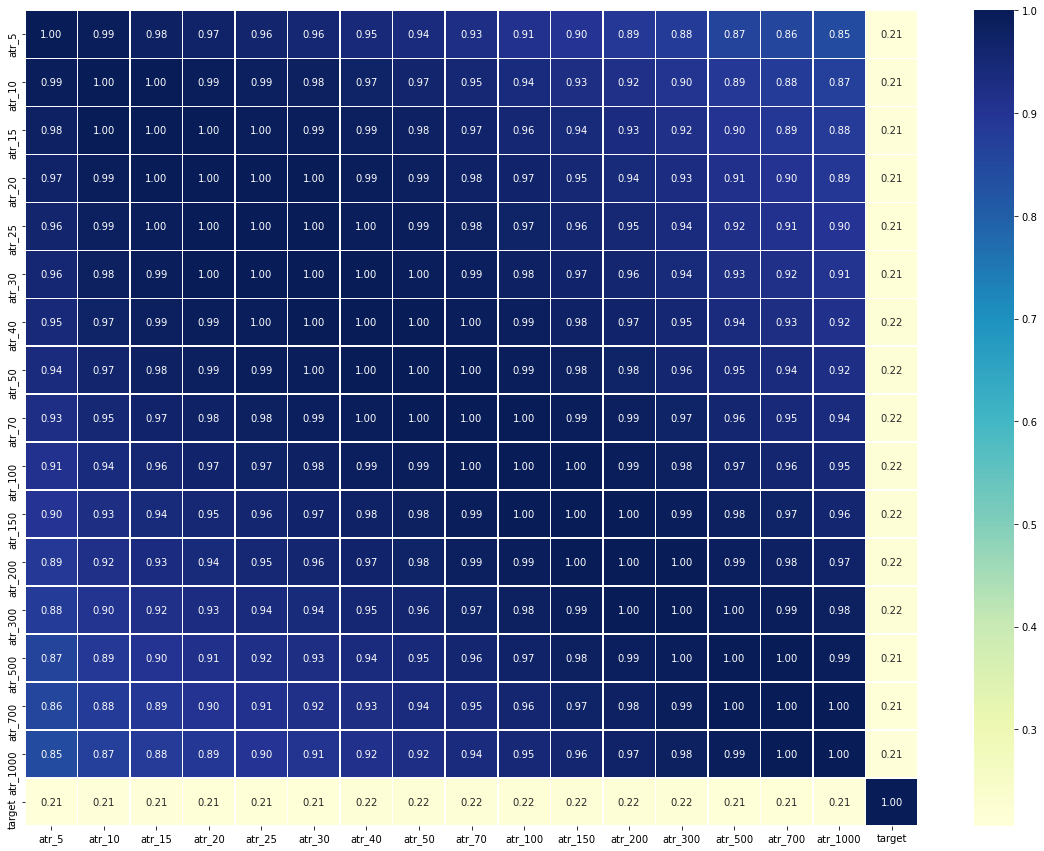

In [5]:
indicators = list(df.columns)[14:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

# Investigation into base ATR

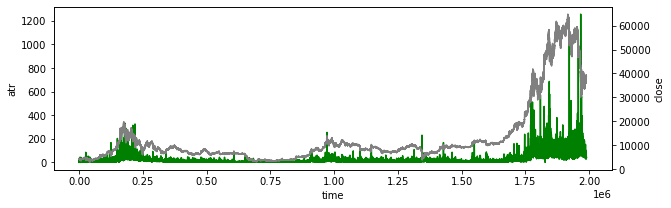

In [10]:
fig,ax = plt.subplots(figsize=(10, 3))
ax.plot(df.atr_15,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

### Atr relative to closing price
Results: Higher correlation: 0.21. Decent correlation with atr

In [11]:
df["atr_o_close"] = list(map(lambda a, c: a/c, df.atr_100, df.close))
df["atr_o_close_log"] = list(map(lambda a, c: np.log(a/c), df.atr_100, df.close))
df["atr_o_close_amp"] = list(map(lambda a, c: np.log(a*100/c), df.atr_100, df.close))

<ipython-input-11-3e3cb3aa19fb>:2: RuntimeWarning: divide by zero encountered in log
  df["atr_o_close_log"] = list(map(lambda a, c: np.log(a/c), df.atr_100, df.close))
<ipython-input-11-3e3cb3aa19fb>:3: RuntimeWarning: divide by zero encountered in log
  df["atr_o_close_amp"] = list(map(lambda a, c: np.log(a*100/c), df.atr_100, df.close))


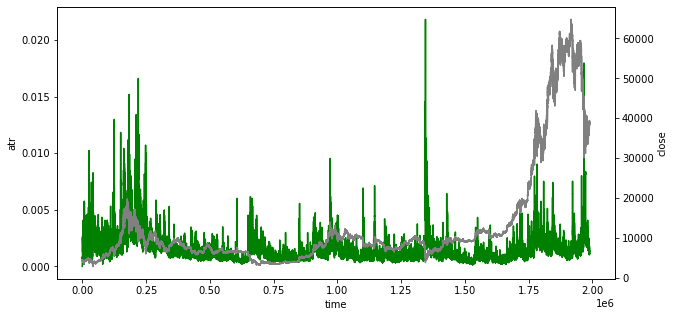

In [15]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(df.atr_o_close,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
plt.show()

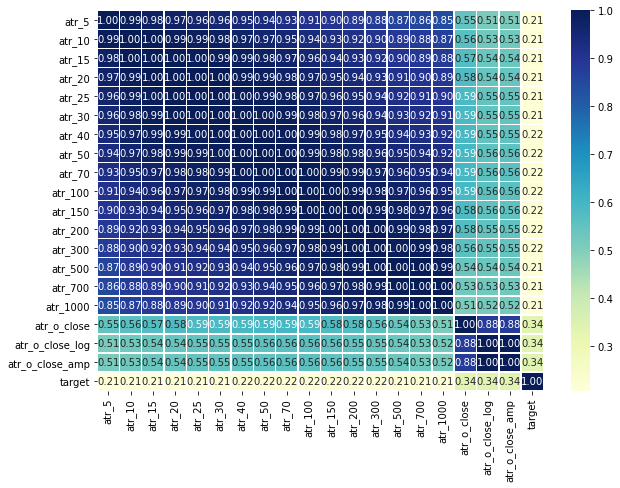

In [14]:
indicators = list(df.columns)[14:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Atr rate of change
Purpose: Find the rate of change (slope or first derivative) of ATR

Results: No correlation

In [20]:
df["atr_ma"] = uf.get_moving_average(df.atr_100, window=14)
df["atr_rate"] = uf.get_rate(df.atr_ma)
df["atr_rate_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df.atr_rate))
df["atr_rate_amp"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), df.atr_oc_rate))
df["atr_oc_ma"] = uf.get_moving_average(df.atr_100, window=14)
df["atr_oc_rate"] = uf.get_rate(df.atr_oc_ma)
df["atr_oc_rate_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df.atr_oc_rate))
df["atr_oc_rate_amp"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), df.atr_oc_rate))

In [23]:
df["atr_oc_rate_amp_abs"] = list(map(lambda x: abs(x), df.atr_oc_rate_amp))

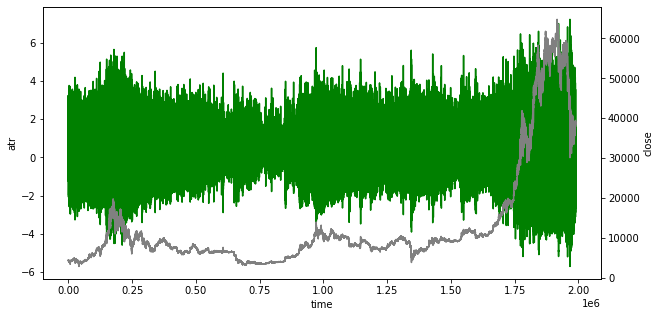

In [21]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(df.atr_oc_rate_amp,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
plt.show()

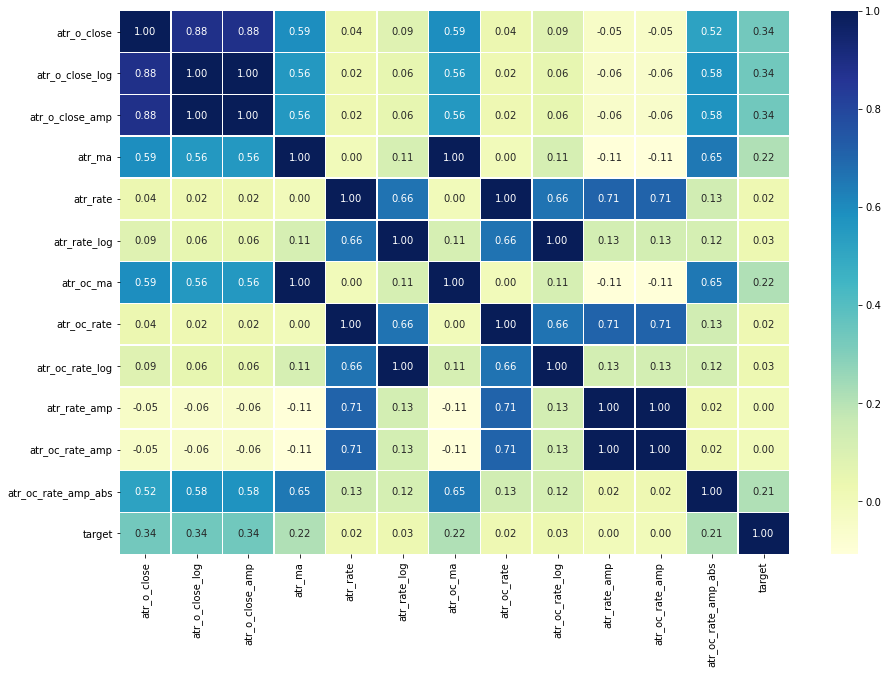

In [24]:
indicators = list(df.columns)[30:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Second derivative

In [25]:
df["atr_ma_2"] = uf.get_moving_average(df.atr_ma, window=14)
df["atr_rate_2"] = uf.get_rate(df.atr_ma_2)
df["atr_rate_2_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df.atr_rate_2))

In [26]:
df.tail()

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,atr_rate_log,atr_oc_ma,atr_oc_rate,atr_oc_rate_log,atr_rate_amp,atr_oc_rate_amp,atr_oc_rate_amp_abs,atr_ma_2,atr_rate_2,atr_rate_2_log
1988733,2021-06-03 20:24:00,38665.26,38689.56,38655.91,38682.52,14.795718,1622751899999,5.722516e+05,457,5.929895,...,0.0,43.385489,-0.067646,0.0,-1.911698,-1.911698,1.911698,43.944280,-0.080952,0.0
1988734,2021-06-03 20:25:00,38682.52,38682.53,38643.07,38649.70,16.778473,1622751959999,6.486770e+05,563,6.614560,...,0.0,43.326120,-0.059369,0.0,-1.781190,-1.781190,1.781190,43.862686,-0.081593,0.0
1988735,2021-06-03 20:26:00,38649.69,38682.52,38649.69,38682.52,15.709853,1622752019999,6.074695e+05,566,11.004542,...,0.0,43.254080,-0.072040,0.0,-1.974633,-1.974633,1.974633,43.778740,-0.083946,0.0
1988736,2021-06-03 20:27:00,38682.52,38682.69,38640.40,38649.38,23.010205,1622752079999,8.894626e+05,590,7.261787,...,0.0,43.190482,-0.063598,0.0,-1.849996,-1.849996,1.849996,43.694715,-0.084025,0.0
1988737,2021-06-03 20:28:00,38649.38,38718.00,38648.01,38700.51,48.112405,1622752139999,1.860678e+06,809,36.559396,...,0.0,43.162785,-0.027698,0.0,-1.018764,-1.018764,1.018764,43.614572,-0.080143,0.0


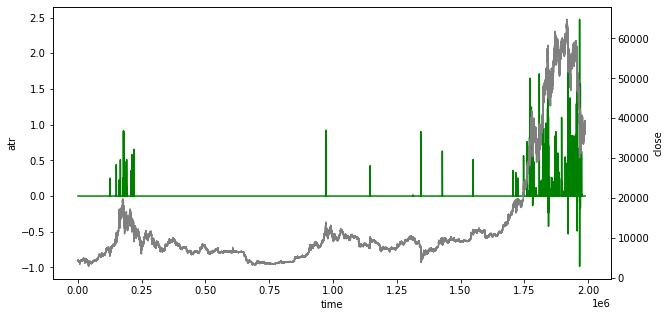

In [27]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(df.atr_rate_2_log,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
plt.show()

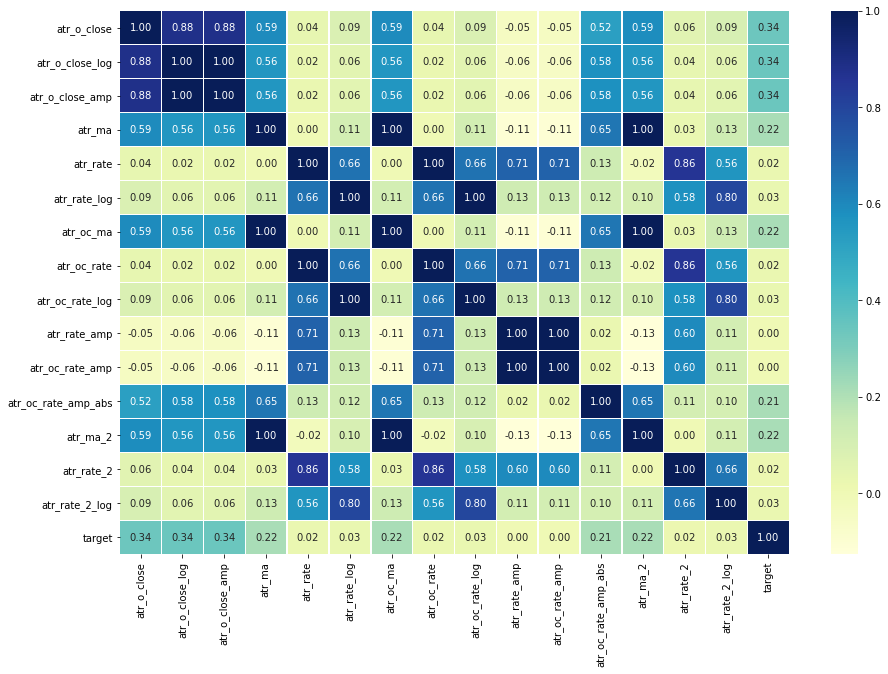

In [28]:
indicators = list(df.columns)[30:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Feature importance

In [65]:
d = df.copy()
d.dropna(inplace=True)
close = d["close"]
d = d[list(indicators)].copy()

X = d.drop(["target"], axis=1)
y = d["target"]

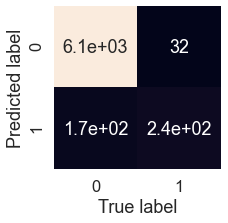

In [54]:
crg.plot_conf_matrix(X, y)

In [55]:
crg.generate_report(X, y, remind=True)

{'precision': 0.13928410456928458,
 'recall': 0.2512512436871072,
 'f1': 0.07884769198407554,
 'remind': {'Precision': 'Portion of guessed positives that are actually correct',
  'Recall': 'Portion of actual positives that are guessed correct',
  'F1': 'Balance, use if uneven class distribution (ie large # actual negatives)'}}

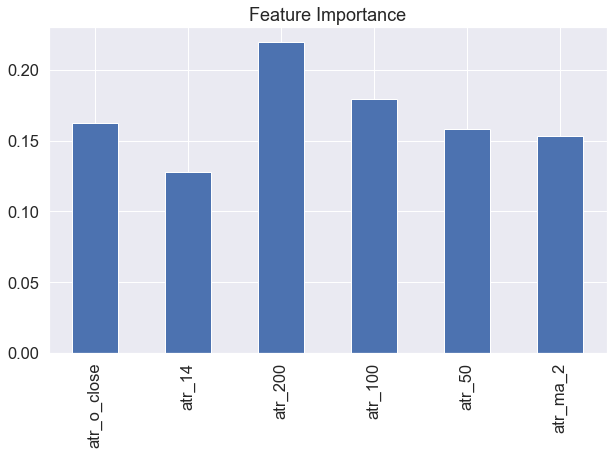

In [76]:
crg.feature_importance(X, y, plot=True)

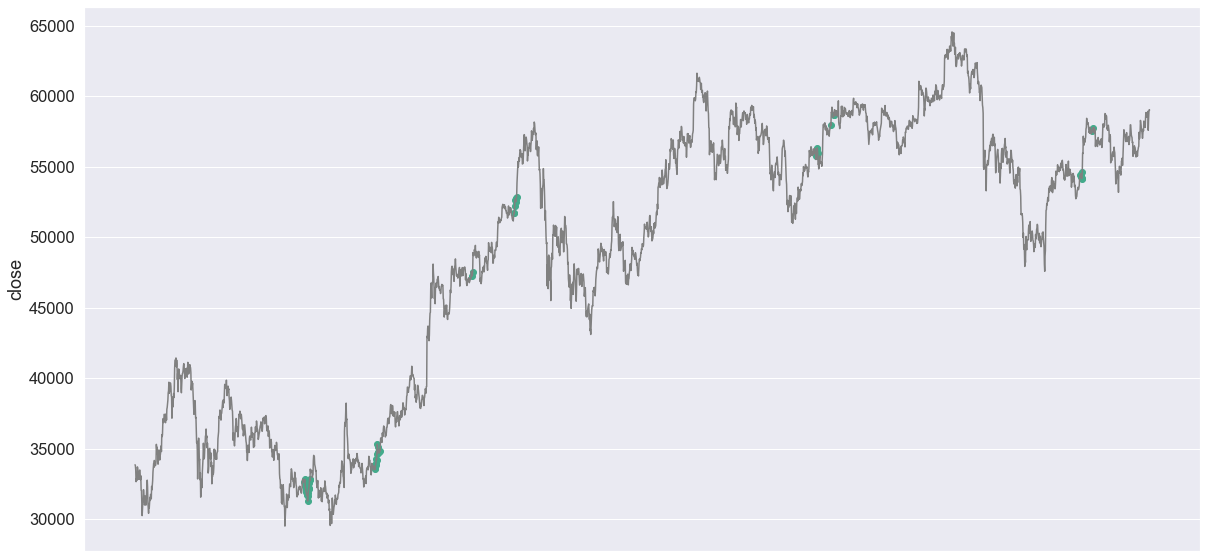

In [59]:
crg.foward_test(X, y, close, mistakes=False)

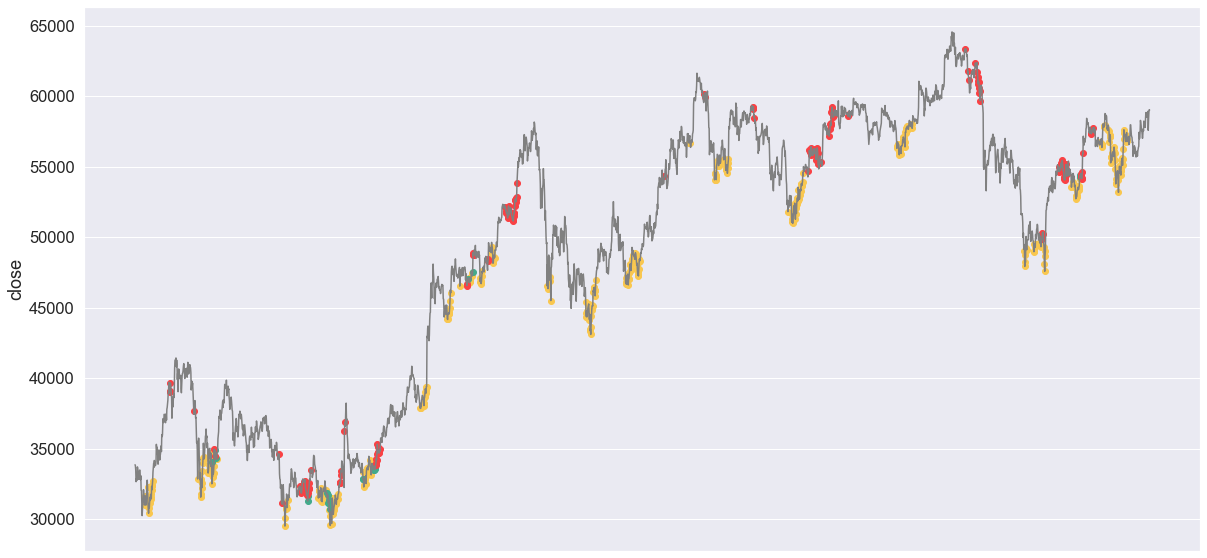

In [60]:
crg.foward_test(X, y, close, mistakes=True)

In [74]:
X = X[["atr_o_close", "atr_14", "atr_200", "atr_100", "atr_50", "atr_ma_2"]]

In [75]:
crg.generate_report(X, y)

{'precision': 0.21089082852359073,
 'recall': 0.249744965428647,
 'f1': 0.08291540171319414}